In [1]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from collections import Counter

# loading linear algorithms
from sklearn.linear_model import LogisticRegression

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
#read in CSV
df = pd.read_csv('Imputed_Data.csv')
df.head()

,Unnamed: 0,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,1,1,139812,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1176 non-null   int64  
 1   group                     1176 non-null   int64  
 2   ID                        1176 non-null   int64  
 3   outcome                   1176 non-null   float64
 4   age                       1176 non-null   int64  
 5   gendera                   1176 non-null   int64  
 6   BMI                       1176 non-null   float64
 7   hypertensive              1176 non-null   int64  
 8   atrialfibrillation        1176 non-null   int64  
 9   CHD with no MI            1176 non-null   int64  
 10  diabetes                  1176 non-null   int64  
 11  deficiencyanemias         1176 non-null   int64  
 12  depression                1176 non-null   int64  
 13  Hyperlipemia              1176 non-null   int64  
 14  Renal fa

In [5]:
df.columns

Index(['Unnamed: 0', 'group', 'ID', 'outcome', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF', 'Comorbidities'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'group', 'ID'],  axis=1, inplace=True)
df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [7]:
df_sub = df[['outcome', 'Bicarbonate', 'Urine output', 'INR', 'Systolic blood pressure', 'Lymphocyte', 'Leucocyte', 'Blood calcium', 'Blood sodium', 'Comorbidities']].copy()
df_sub.head()

,outcome,Bicarbonate,Urine output,INR,Systolic blood pressure,Lymphocyte,Leucocyte,Blood calcium,Blood sodium,Comorbidities
0,0.0,21.166667,2155.0,1.000000,155.866667,13.300000,7.650000,7.463636,138.750000,4.0
1,0.0,33.444444,1425.0,1.626064,140.000000,12.232717,12.740000,8.162500,138.888889,2.0
2,0.0,30.571429,2425.0,0.950000,135.333333,24.500000,5.480000,8.266667,140.714286,2.0
3,0.0,38.571429,8760.0,2.666667,126.400000,14.500000,8.225000,9.476923,138.500000,0.0
4,0.0,22.000000,4455.0,1.626064,156.560000,12.232717,8.833333,8.733333,136.666667,4.0


In [8]:
# Create our features
X = df_sub.drop('outcome', axis=1)
y = df_sub['outcome']

In [9]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    
    print(conf_matrix_test)

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    print()
    
    # Creates the Roc Curve
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

In [10]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train_old, X_test, y_train_old, y_test = train_test_split(X, y, stratify=y, random_state=42)

print(len(X_train_old) / len(X))
print(len(X_test) / len(X))

0.75
0.25


In [11]:
# Resample the data using the ClusterCentroids resampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_train, y_train = ros.fit_resample(X_train_old, y_train_old)
Counter(y_train)

Counter({0.0: 119, 1.0: 119})

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       119
         1.0       0.71      0.71      0.71       119

    accuracy                           0.71       238
   macro avg       0.71      0.71      0.71       238
weighted avg       0.71      0.71      0.71       238

[[85 34]
 [35 84]]
root mean squared error (RMSE): 0.538438451809076
R-squared (R2 ): -0.1596638655462186
MAE 0.28991596638655465

Testing SET
              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81       254
         1.0       0.27      0.68      0.39        40

    accuracy                           0.71       294
   macro avg       0.60      0.70      0.60       294
weighted avg       0.84      0.71      0.75       294

[[182  72]
 [ 13  27]]
root mean squared error (RMSE): 0.5376947519350579
R-squared (R2 ): -1.4596456692913384
MAE 0.2891156462585034



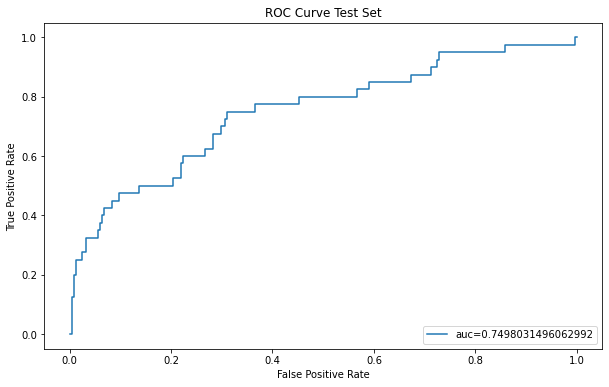

In [13]:
# Logistic Regression
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

In [14]:
importances = pd.DataFrame(data={
    'Feature': X.columns,
    'Importance': lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                   Feature  Importance
8            Comorbidities    0.228670
5                Leucocyte    0.208253
2                      INR    0.102700
7             Blood sodium    0.079307
3  Systolic blood pressure   -0.192075
4               Lymphocyte   -0.195238
6            Blood calcium   -0.325987
1             Urine output   -0.383663
0              Bicarbonate   -0.627650


TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       119
         1.0       1.00      1.00      1.00       119

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

[[119   0]
 [  0 119]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.92      0.65      0.76       254
         1.0       0.22      0.62      0.32        40

    accuracy                           0.64       294
   macro avg       0.57      0.64      0.54       294
weighted avg       0.82      0.64      0.70       294

[[164  90]
 [ 15  25]]
root mean squared error (RMSE): 0.5976143046671968
R-squared (R2 ): -2.0383858267716533
MAE 0.35714285714285715



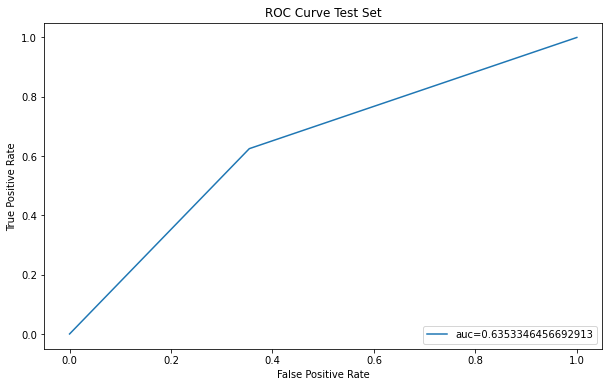

In [15]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt = evaluateModel(dt, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       119
         1.0       1.00      1.00      1.00       119

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

[[119   0]
 [  0 119]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83       254
         1.0       0.28      0.62      0.39        40

    accuracy                           0.73       294
   macro avg       0.60      0.69      0.61       294
weighted avg       0.84      0.73      0.77       294

[[190  64]
 [ 15  25]]
root mean squared error (RMSE): 0.5183700251685057
R-squared (R2 ): -1.286023622047244
MAE 0.2687074829931973



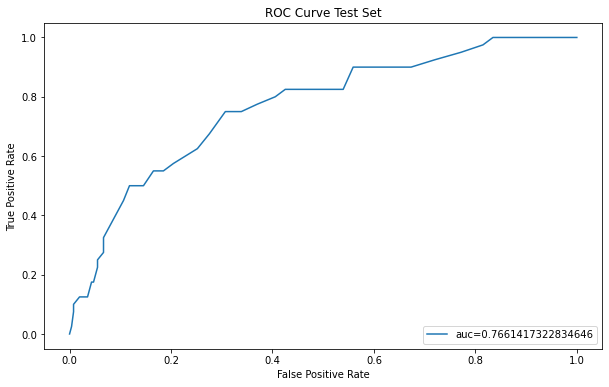

In [16]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=50)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

In [17]:
# List the features sorted in descending order by feature importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.1744311746679413, 'Urine output'),
 (0.16020199960369705, 'Bicarbonate'),
 (0.14081368139456202, 'Blood calcium'),
 (0.10143334407257029, 'Leucocyte'),
 (0.09984464399142669, 'Systolic blood pressure'),
 (0.09921428645027218, 'Lymphocyte'),
 (0.0962395333050022, 'Blood sodium'),
 (0.0730950530741188, 'INR'),
 (0.05472628344040949, 'Comorbidities')]

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       119
         1.0       1.00      1.00      1.00       119

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

[[119   0]
 [  0 119]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.81       254
         1.0       0.25      0.57      0.35        40

    accuracy                           0.71       294
   macro avg       0.58      0.65      0.58       294
weighted avg       0.83      0.71      0.75       294

[[185  69]
 [ 17  23]]
root mean squared error (RMSE): 0.5408484138857403
R-squared (R2 ): -1.488582677165354
MAE 0.2925170068027211



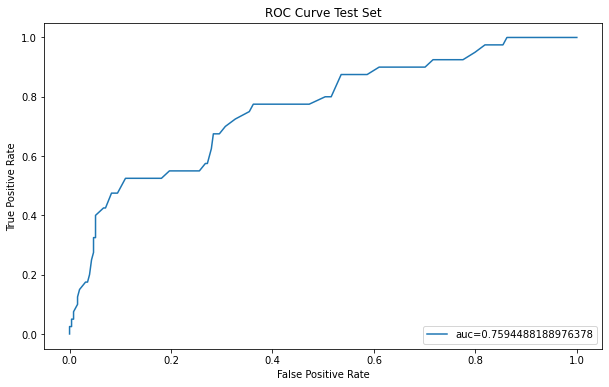

In [18]:
et = ExtraTreesClassifier(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       119
         1.0       0.92      0.91      0.91       119

    accuracy                           0.91       238
   macro avg       0.91      0.91      0.91       238
weighted avg       0.91      0.91      0.91       238

[[109  10]
 [ 11 108]]
root mean squared error (RMSE): 0.2970442628930023
R-squared (R2 ): 0.6470588235294117
MAE 0.08823529411764706

Testing SET
              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80       254
         1.0       0.26      0.68      0.38        40

    accuracy                           0.70       294
   macro avg       0.60      0.69      0.59       294
weighted avg       0.84      0.70      0.74       294

[[178  76]
 [ 13  27]]
root mean squared error (RMSE): 0.5502009527757782
R-squared (R2 ): -1.5753937007874015
MAE 0.30272108843537415



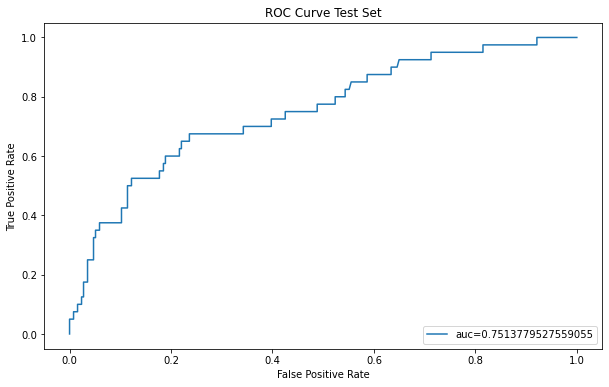

In [19]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       119
         1.0       1.00      1.00      1.00       119

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

[[119   0]
 [  0 119]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.93      0.73      0.82       254
         1.0       0.27      0.65      0.39        40

    accuracy                           0.72       294
   macro avg       0.60      0.69      0.60       294
weighted avg       0.84      0.72      0.76       294

[[185  69]
 [ 14  26]]
root mean squared error (RMSE): 0.5313312762957475
R-squared (R2 ): -1.4017716535433071
MAE 0.282312925170068



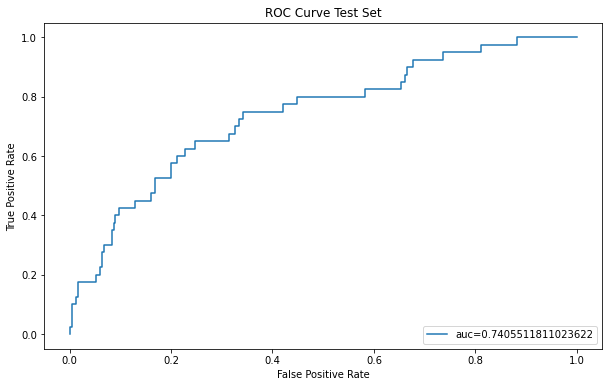

In [20]:
gb = GradientBoostingClassifier(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       119
         1.0       1.00      1.00      1.00       119

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

[[119   0]
 [  0 119]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79       254
         1.0       0.23      0.60      0.34        40

    accuracy                           0.68       294
   macro avg       0.57      0.64      0.56       294
weighted avg       0.82      0.68      0.73       294

[[175  79]
 [ 16  24]]
root mean squared error (RMSE): 0.5684445898244439
R-squared (R2 ): -1.7490157480314958
MAE 0.3231292517006803



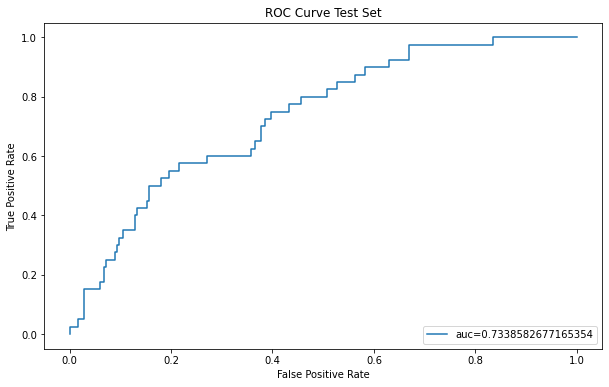

In [21]:
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

In [22]:
# List the features sorted in descending order by feature importance
sorted(zip(xgb.feature_importances_, X.columns), reverse=True)

[(0.19320713, 'Bicarbonate'),
 (0.121479094, 'Comorbidities'),
 (0.115102075, 'Leucocyte'),
 (0.10526999, 'INR'),
 (0.104247, 'Urine output'),
 (0.102605425, 'Systolic blood pressure'),
 (0.091065615, 'Lymphocyte'),
 (0.083844006, 'Blood sodium'),
 (0.08317968, 'Blood calcium')]

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       119
         1.0       1.00      1.00      1.00       119

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

[[119   0]
 [  0 119]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.93      0.73      0.82       254
         1.0       0.28      0.68      0.40        40

    accuracy                           0.72       294
   macro avg       0.61      0.70      0.61       294
weighted avg       0.85      0.72      0.76       294

[[185  69]
 [ 13  27]]
root mean squared error (RMSE): 0.5281207860194961
R-squared (R2 ): -1.3728346456692915
MAE 0.2789115646258503



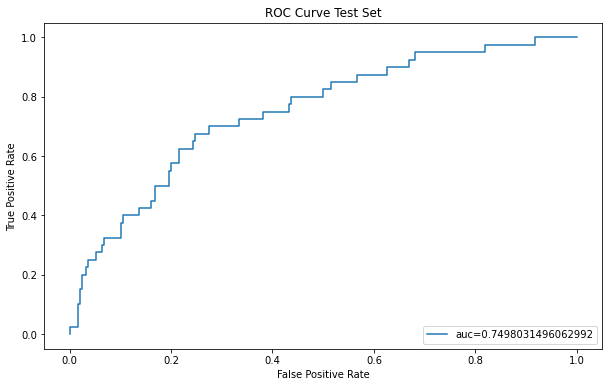

In [23]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81       119
         1.0       0.79      0.87      0.83       119

    accuracy                           0.82       238
   macro avg       0.82      0.82      0.82       238
weighted avg       0.82      0.82      0.82       238

[[ 91  28]
 [ 15 104]]
root mean squared error (RMSE): 0.4250556068416967
R-squared (R2 ): 0.2773109243697479
MAE 0.18067226890756302

Testing SET
              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79       254
         1.0       0.24      0.62      0.35        40

    accuracy                           0.68       294
   macro avg       0.58      0.66      0.57       294
weighted avg       0.83      0.68      0.73       294

[[175  79]
 [ 15  25]]
root mean squared error (RMSE): 0.5654448612875199
R-squared (R2 ): -1.7200787401574802
MAE 0.3197278911564626



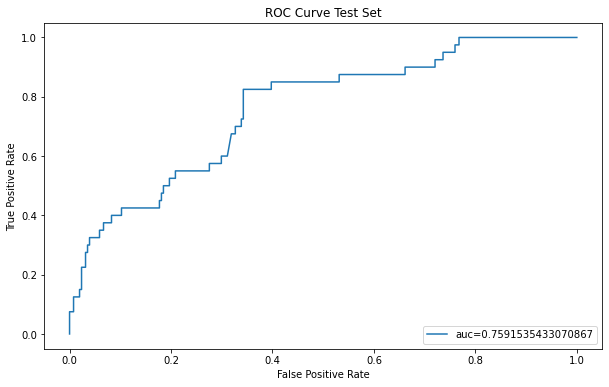

In [24]:
clf = svm.SVC(probability=True)
clf = evaluateModel(clf, X_train, y_train, X_test, y_test)

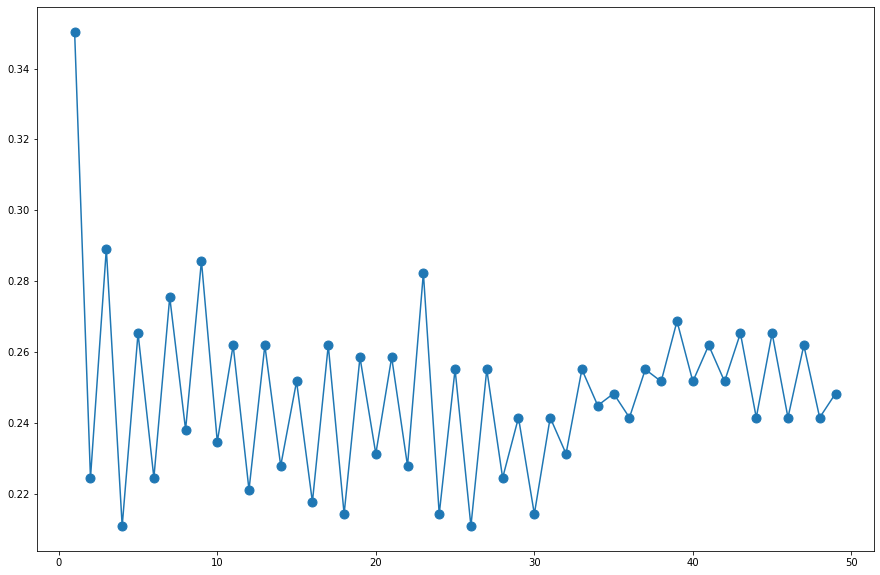

In [25]:
#determine optimal value of K
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       119
         1.0       0.81      0.82      0.81       119

    accuracy                           0.81       238
   macro avg       0.81      0.81      0.81       238
weighted avg       0.81      0.81      0.81       238

[[96 23]
 [22 97]]
root mean squared error (RMSE): 0.43482827673933633
R-squared (R2 ): 0.24369747899159666
MAE 0.18907563025210083

Testing SET
              precision    recall  f1-score   support

         0.0       0.91      0.74      0.81       254
         1.0       0.25      0.55      0.34        40

    accuracy                           0.71       294
   macro avg       0.58      0.64      0.58       294
weighted avg       0.82      0.71      0.75       294

[[187  67]
 [ 18  22]]
root mean squared error (RMSE): 0.5376947519350579
R-squared (R2 ): -1.4596456692913384
MAE 0.2891156462585034



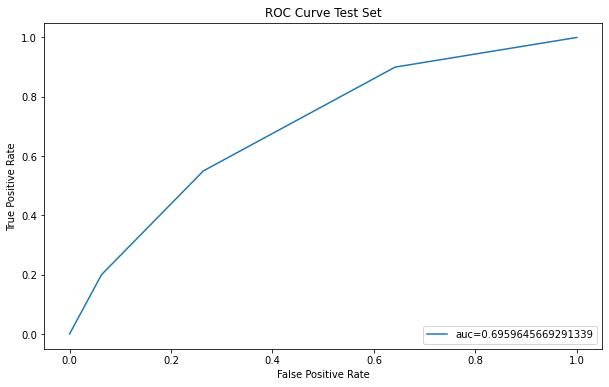

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = evaluateModel(knn, X_train, y_train, X_test, y_test)